In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [2]:
raw_data = pd.read_csv('한국지능정보사회진흥원_2021년 스마트폰과의존실태조사 Raw Data(공개용)_20220509.csv', encoding='euc-kr')

C:\Users\seung\AppData\Local\Temp\ipykernel_36196\3151311488.py:1: DtypeWarning: Columns (122,134,143,166,208,210,224,228) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv('한국지능정보사회진흥원_2021년 스마트폰과의존실태조사 Raw Data(공개용)_20220509.csv', encoding='euc-kr')


In [3]:
data = raw_data[['RELATION', 'SEX','AGE', 'Q2A1', 'Q2A2', 'Q2A3', 'Q2A4', 'Q5', 'Q5A', 'Q5B', 'Q27', 'SQ3']]
del(raw_data)
data.head()

,RELATION,SEX,AGE,Q2A1,Q2A2,Q2A3,Q2A4,Q5,Q5A,Q5B,Q27,SQ3
0,1,2,33,35,25,15,25,1,4.0,4.0,2,NaN
1,1,1,40,35,20,20,25,1,4.0,2.0,2,NaN
2,1,1,59,35,25,20,20,1,1.0,2.0,2,NaN
3,1,1,49,35,20,20,25,1,2.0,2.0,2,NaN
4,1,1,55,40,20,25,15,1,1.0,3.0,2,NaN


# 컬럼명 재설정

In [4]:
data.rename(columns={'RELATION':'가구원_관계',
                     'SEX':'성별',
                     'AGE':'나이',
                     'Q2A1':'일/학업/가사',
                     'Q2A2':'여가',
                     'Q2A3':'커뮤니케이션',
                     'Q2A4':'생활편의',
                     'Q5':'동영상_서비스',
                     'Q5A':'동영상_이용빈도',
                     'Q5B':'동영상_하루평균이용시간',
                     'Q27':'코로나격리',
                     'SQ3':'맞벌이',
                    },
            inplace=True
           )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25198 entries, 0 to 25197
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가구원_관계        25198 non-null  int64  
 1   성별            25198 non-null  int64  
 2   나이            25198 non-null  int64  
 3   일/학업/가사       25198 non-null  int64  
 4   여가            25198 non-null  int64  
 5   커뮤니케이션        25198 non-null  int64  
 6   생활편의          25198 non-null  int64  
 7   동영상_서비스       25198 non-null  int64  
 8   동영상_이용빈도      23498 non-null  float64
 9   동영상_하루평균이용시간  23498 non-null  float64
 10  코로나격리         25198 non-null  int64  
 11  맞벌이           3487 non-null   float64
dtypes: float64(3), int64(9)
memory usage: 2.3 MB


In [5]:
data = data.astype('int8', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25198 entries, 0 to 25197
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가구원_관계        25198 non-null  int8   
 1   성별            25198 non-null  int8   
 2   나이            25198 non-null  int8   
 3   일/학업/가사       25198 non-null  int8   
 4   여가            25198 non-null  int8   
 5   커뮤니케이션        25198 non-null  int8   
 6   생활편의          25198 non-null  int8   
 7   동영상_서비스       25198 non-null  int8   
 8   동영상_이용빈도      23498 non-null  float64
 9   동영상_하루평균이용시간  23498 non-null  float64
 10  코로나격리         25198 non-null  int8   
 11  맞벌이           3487 non-null   float64
dtypes: float64(3), int8(9)
memory usage: 812.2 KB


# 가설
1. 스마트폰 이용 구성비 중 가장 많은 비중을 차지한 것은 '여가'일 것이다.
1. 남성과 여성의 스마트폰 이용 구성비는 5%p 넘는 차이가 있을 것이다.
1. 동영상 서비스 평균 이용 시간은 ...
    1. 코로나 격리를 경험한 사람들이 아닌 사람들에 비해 높게 나타날 것이다.
    2. 나이가 10대에 가까울 수록 하루평균이용시간이 높게 나타날 것이다.
    3. 맞벌이 가족인 자녀(유아동,청소년)들이 아닌 자녀들에 비해 하루평균이용시간이 높게 나타날 것이다.

In [6]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 스마트폰 이용 구성비 중 가장 많은 비중을 차지한 것은 '여가'일 것이다.
- stacked bar로 바꾸는 게 더 나을지 고민

In [7]:
d_1 = data[['일/학업/가사', '여가', '커뮤니케이션', '생활편의']].mean()
d_1

일/학업/가사    34.833320
여가         28.136955
커뮤니케이션     18.123462
생활편의       18.906262
dtype: float64

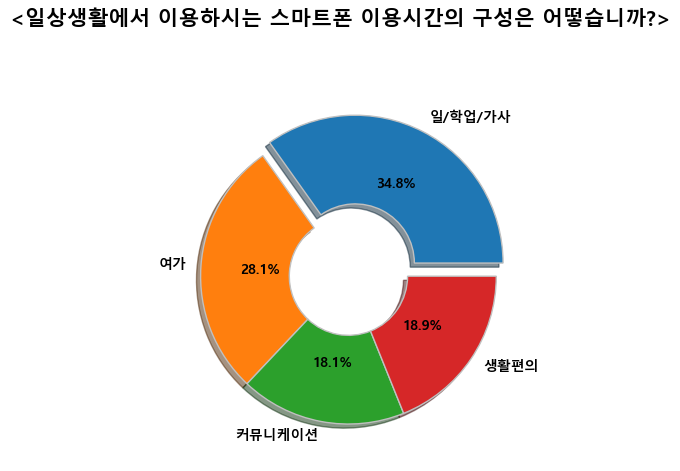

In [8]:
textprops={'weight':'bold'}
wedgeprops={'width':0.6, 'edgecolor': 'silver'}
explode=[0.1, 0, 0, 0]

d_1.plot(kind='pie',
        autopct='%.1f%%',
        explode=explode,
        wedgeprops=wedgeprops,
        textprops=textprops,
        shadow=True,
        )
plt.suptitle(f"<일상생활에서 이용하시는 스마트폰 이용시간의 구성은 어떻습니까?>",
             size=15,
             weight='bold',
             x=0.5,
             y=1.05,
            )

plt.savefig('graph/일상생활 스마트폰 이용시간 구성비_전체.jpg')
plt.show()

[가설검증 1] 스마트폰 이용 구성비 중 가장 많은 비중을 차지한 것은 '여가'일 것이다.
- '일/학업/가사'는 평균 34.8%로 가장 많은 이용 구성비로 나타났다.
- 가장 많은 비중으로 예측했던 '여가'의 이용 구성비는 평균 28.1%이다.

## 남성과 여성의 스마트폰 이용 구성비는 5%p 넘는 차이가 있을 것이다.

In [9]:
d_2 = data.groupby('성별')[['일/학업/가사', '여가', '커뮤니케이션', '생활편의']].mean()
d_2

,일/학업/가사,여가,커뮤니케이션,생활편의
성별,,,,
1,35.577904,28.231737,17.969316,18.221043
2,34.139319,28.048612,18.267137,19.544932


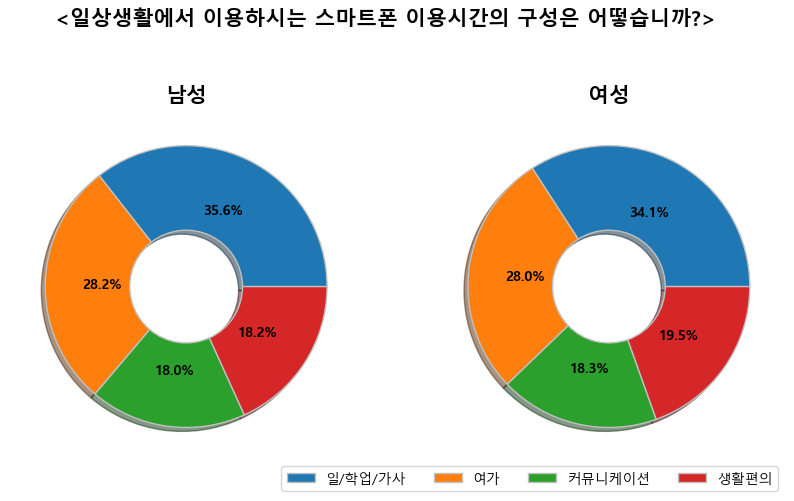

In [10]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

textprops={'weight':'bold'}

ax[0].pie(x=d_2.T[1],
         autopct='%.1f%%',
         shadow=True,
         wedgeprops=wedgeprops,
         textprops=textprops,
         )
ax[0].set_title('남성',
                fontdict={'size':15, 'weight':'bold'},
               )

ax[1].pie(x=d_2.T[2],
         autopct='%.1f%%',
         shadow=True,
         wedgeprops=wedgeprops,
         textprops=textprops,
         )
ax[1].set_title('여성',
                fontdict={'size':15, 'weight':'bold'},
               )

plt.suptitle(f"<일상생활에서 이용하시는 스마트폰 이용시간의 구성은 어떻습니까?>",
             size=15,
             weight='bold',
             x=0.5,
             y=1.05,
            )
plt.legend(labels=['일/학업/가사', '여가', '커뮤니케이션', '생활편의'],
           loc='lower right',
           ncols=4,
           bbox_to_anchor=(1,-0.1),   
          )

plt.savefig('graph/일상생활 스마트폰 이용시간 구성비_성별.jpg')
plt.show()

[가설검증 2] 남성과 여성의 스마트폰 이용 구성비는 5%p 넘는 차이가 있을 것이다.
- 남성과 여성의 스마트폰 이용 구성비의 차이가 가장 많이 나타난 항목은 '일/학업/가사'로 1.5%p 차이가 났으며 가장 적게 나타난 항목은 '여가'로 0.2%p의 차이가 나타났다.
- 각 항목별 차이를 합산한 값은 3.3%p 차이로 5%p 넘는 차이가 나타나지 않았다.

## 동영상 서비스 평균 이용 시간은 ...

### 코로나 격리를 경험한 사람들이 아닌 사람들에 비해 높게 나타날 것이다.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25198 entries, 0 to 25197
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   가구원_관계        25198 non-null  int8   
 1   성별            25198 non-null  int8   
 2   나이            25198 non-null  int8   
 3   일/학업/가사       25198 non-null  int8   
 4   여가            25198 non-null  int8   
 5   커뮤니케이션        25198 non-null  int8   
 6   생활편의          25198 non-null  int8   
 7   동영상_서비스       25198 non-null  int8   
 8   동영상_이용빈도      23498 non-null  float64
 9   동영상_하루평균이용시간  23498 non-null  float64
 10  코로나격리         25198 non-null  int8   
 11  맞벌이           3487 non-null   float64
dtypes: float64(3), int8(9)
memory usage: 812.2 KB


In [12]:
d_3_a = data[['동영상_서비스', '코로나격리', '동영상_하루평균이용시간']][data['동영상_서비스'] != 2].drop(columns='동영상_서비스').astype('int8')

In [13]:
d_3_a = d_3_a.groupby('코로나격리').value_counts().sort_index()
d_3_a

코로나격리  동영상_하루평균이용시간
1      1                  6
       2                149
       3                308
       4                351
       5                146
       6                  8
2      1                988
       2               5365
       3               7923
       4               5713
       5               2376
       6                165
Name: count, dtype: int64

In [14]:
d_3_a[1]

동영상_하루평균이용시간
1      6
2    149
3    308
4    351
5    146
6      8
Name: count, dtype: int64

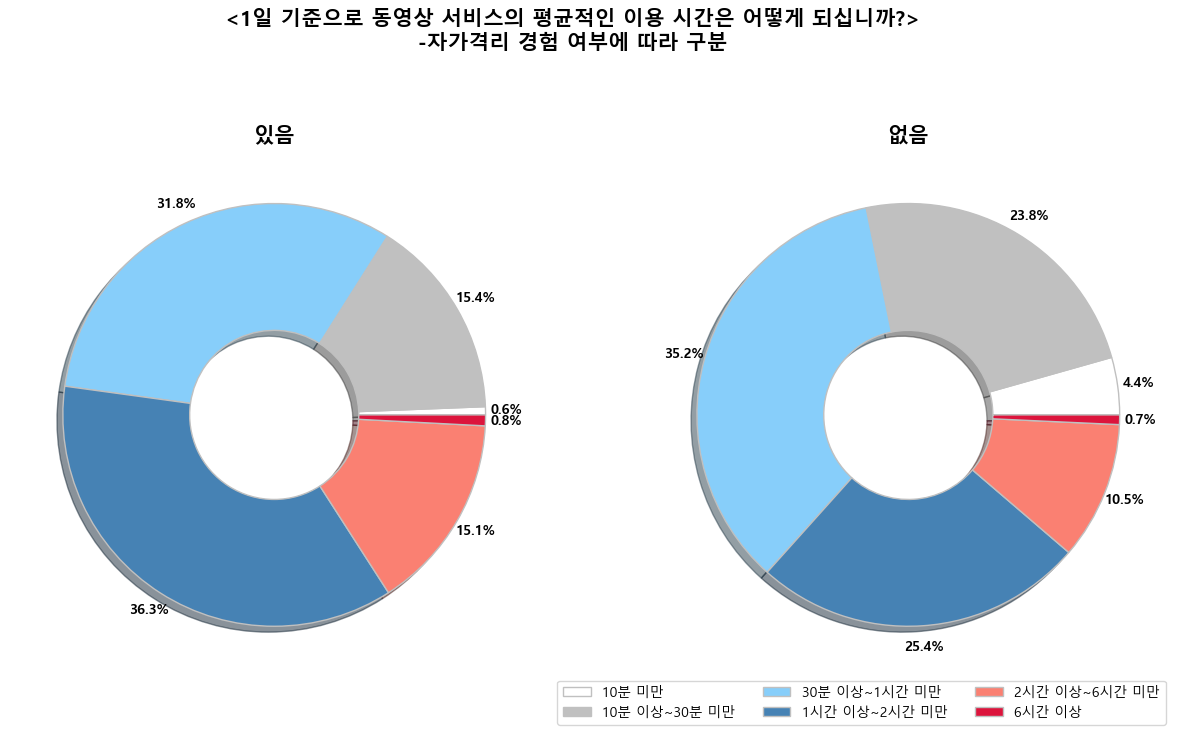

In [15]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 10)
label = ['매우 부적절하다', '부적절하다', '적절하다', '매우 적절하다']
color = ['w' ,'Silver', 'LightSkyBlue', 'SteelBlue', 'Salmon' ,'Crimson' ]
wedgeprops={'width':0.6, 'edgecolor': 'silver'}
textprops={'weight':'bold'}

ax[0].pie(x=d_3_a[1],
         autopct='%.1f%%',
         shadow=True,
         colors=color,
         wedgeprops=wedgeprops,
         textprops=textprops,
         pctdistance=1.1,
         )
ax[0].set_title('있음',
                fontdict={'size':15, 'weight':'bold'},
               )

ax[1].pie(x=d_3_a[2],
         autopct='%.1f%%',
         shadow=True,
         colors=color,
         wedgeprops=wedgeprops,
         textprops=textprops,
         pctdistance=1.1,
         )
ax[1].set_title('없음',
                fontdict={'size':15, 'weight':'bold'},
               )

plt.suptitle(f"<1일 기준으로 동영상 서비스의 평균적인 이용 시간은 어떻게 되십니까?>\n-자가격리 경험 여부에 따라 구분",
             size=15,
             weight='bold',
             x=0.5,
             y=0.9,
            )
plt.legend(labels=['10분 미만', '10분 이상~30분 미만', '30분 이상~1시간 미만', '1시간 이상~2시간 미만', '2시간 이상~6시간 미만', '6시간 이상'],
           loc='lower right',
           ncols=3,
           bbox_to_anchor=(1,-0.1),   
          )

plt.savefig('graph/자가격리 경험 여부에 따른 1일 기준 동영상 서비스의 평균적인 이용시간.jpg')
plt.show()

[가설검증 3.1] 동영상 서비스 평균 이용 시간은 코로나 자가격리를 경험한 사람들이 아닌 사람들에 비해 높게 나타날 것이다.
- 평균 1시간 이상 사용한다고 응답한 비율은 코로나 격리를 경험한 사람의 경우 52.2%, 경험하지 않은 사람의 경우 36.6%로 코로나 자가격리를 경험한 사람들의 동영상 서비스 평균 이용 시간이 그렇지 않은 사람보다 더 긴 것으로 나타났다.

### 나이가 10대에 가까울 수록 하루 평균 이용 시간이 높게 나타날 것이다.
- 나이에 따른 동영상 서비스의 하루 평균 이용시간의 변화 추이만 비교하기 위해 각 나이에 응답한 번호들의 합을 평균한 선형 그래프로 표시하였다.

In [16]:
d_3_b = data[['나이','동영상_서비스', '동영상_하루평균이용시간']]\
[data['동영상_서비스'] != 2].drop(columns='동영상_서비스').astype('int8')

d_3_b.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23498 entries, 0 to 25197
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   나이            23498 non-null  int8 
 1   동영상_하루평균이용시간  23498 non-null  int8 
dtypes: int8(2)
memory usage: 229.5 KB


In [17]:
d_3_b.head()

,나이,동영상_하루평균이용시간
0,33,4
1,40,2
2,59,2
3,49,2
4,55,3


In [18]:
d_3_b.동영상_하루평균이용시간.value_counts()

동영상_하루평균이용시간
3    8231
4    6064
2    5514
5    2522
1     994
6     173
Name: count, dtype: int64

In [19]:
d_3_b.groupby('나이').mean()

,동영상_하루평균이용시간
나이,
3,2.298507
4,2.814815
5,2.721429
6,2.872340
7,2.893855
...,...
65,2.876033
66,2.754717
67,2.656934


In [20]:
d_3_b.groupby('나이').mean().sort_values(by='동영상_하루평균이용시간').tail(5)

,동영상_하루평균이용시간
나이,
24,3.643636
21,3.675676
20,3.684564
23,3.694779
22,3.704319


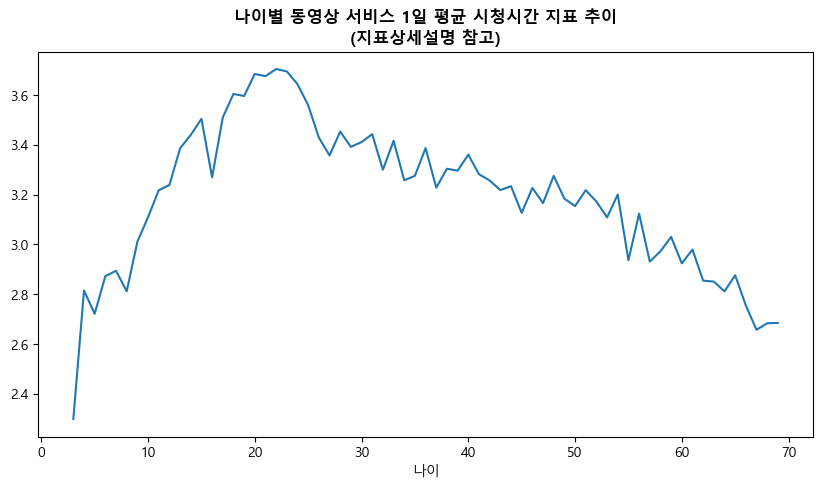

In [35]:
d_3_b.groupby('나이').mean().plot(legend='',
                               figsize=(10,5),
                                    )
plt.title(f'나이별 동영상 서비스 1일 평균 시청시간 지표 추이\n(지표상세설명 참고)', fontdict={'fontweight': 'bold'})
plt.ylabel('')

plt.savefig('graph/나이별 동영상 서비스 1일 평균 시청시간 지표 추이.jpg')
plt.show()

[가설검증 3.2] 동영상 서비스 평균 이용 시간은 나이가 10대에 가까울 수록 하루 평균 이용 시간이 높게 나타날 것이다.
- 그래프를 보면 20대 초반에 가까워질 수록 1일 평균 시청시간 추이 지표가 높아지는 것으로 나타났다.
- 1일 평균 시청시간 추이에서 가장 높은 지표를 나타낸 상위 5개 나이는 20~24세로 나타났으며, 22세의 지표가 3.70으로 가장 높은 지표를 보였다.

### 맞벌이 가족인 자녀(유아동,청소년)들이 아닌 자녀들에 비해 이용빈도와 하루평균이용시간이 높게 나타날 것이다.

In [22]:
d_3_c = data[(data.가구원_관계.isin([3, 4])) & (data.동영상_서비스 == 1)]\
[['동영상_이용빈도', '동영상_하루평균이용시간', '맞벌이']].astype('int8')

d_3_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 10850 to 25197
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   동영상_이용빈도      3333 non-null   int8 
 1   동영상_하루평균이용시간  3333 non-null   int8 
 2   맞벌이           3333 non-null   int8 
dtypes: int8(3)
memory usage: 35.8 KB


In [23]:
d_3_c.head()

,동영상_이용빈도,동영상_하루평균이용시간,맞벌이
10850,1,1,1
11001,2,4,1
11139,1,6,2
11257,1,4,2
11283,1,4,2


In [24]:
d_3_c.groupby(['맞벌이']).mean()

,동영상_이용빈도,동영상_하루평균이용시간
맞벌이,,
1,1.786431,3.237458
2,1.823387,3.215323


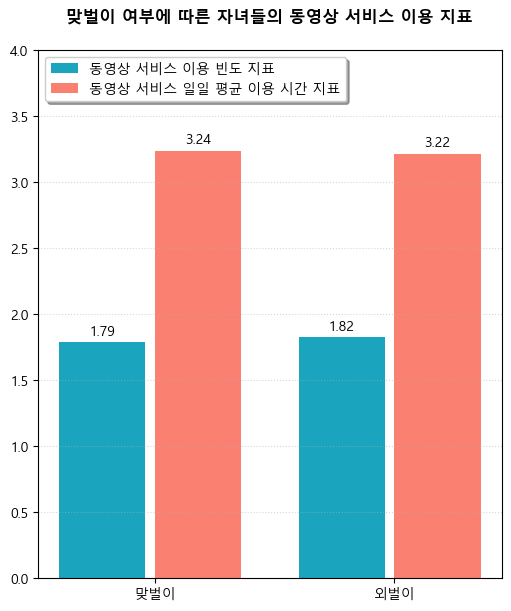

In [34]:
dt_freq_video = d_3_c.groupby(['맞벌이']).mean().동영상_이용빈도.values
dt_mt_video = d_3_c.groupby(['맞벌이']).mean().동영상_하루평균이용시간.values
group_dt_video_x = ('맞벌이', '외벌이')
group_dt_video_y = {
    '동영상 서비스 이용 빈도 지표':dt_freq_video,
    '동영상 서비스 일일 평균 이용 시간 지표':dt_mt_video
}

x = np.arange(len(group_dt_video_x))  # the label locations
width = 0.4 # the width of the bars
multiplier = 0
color=['#1ba4be', 'Salmon']
i = 0

fig, ax = plt.subplots(layout='constrained')
# fig, ax = plt.subplots()
fig.set_size_inches(5, 6)


for attribute, measurement in group_dt_video_y.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width*0.9, label=attribute, align='edge', color=color[i]) # barcontainer 반환
    ax.bar_label(rects, padding=3, fmt='%.2f')
    multiplier += 1
    i += 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('맞벌이 여부에 따른 자녀들의 동영상 서비스 이용 지표', pad=20,
             fontdict={'fontweight': 'bold'})
ax.set_xticks(x + width, group_dt_video_x)
ax.legend(loc='upper left', ncols=1, shadow=True)
ax.set_ylim(0, 4)
plt.grid(axis='y', alpha=0.5, ls=':')

plt.savefig('맞벌이 여부에 따른 자녀들의 동영상 서비스 이용 지표.jpg')
plt.show()

In [26]:
## 맞벌이 여부와 자녀들의 동영상 서비스 이용빈도 간의 독립성 검정 : 카이제곱검정
# 빈도표
df_chi_1 = d_3_c.groupby('맞벌이')['동영상_이용빈도'].value_counts().unstack()\
.rename(index={1:'맞벌이', 2:'외벌이'},
        columns={1:'매일', 2:'일주일에 5~6일', 3:'일주일에 3~4일', 4:'일주일에 1~2일', 5:'한달에 1~3일'})

df_chi_1

동영상_이용빈도,매일,일주일에 5~6일,일주일에 3~4일,일주일에 1~2일,한달에 1~3일
맞벌이,,,,,
맞벌이,1087,507,371,115,13
외벌이,638,276,241,77,8


In [27]:
chi_result_1 = chi2_contingency(df_chi_1)
print(f'카이제곱값 : {chi_result_1[0]}')
print(f'p-vlaue : {chi_result_1[1]}')

카이제곱값 : 3.2538486533851256
p-vlaue : 0.5162776264762328


In [28]:
## 맞벌이 여부와 자녀들의 일일 동영상 서비스 평균 이용 시간 간의 독립성 검정 : 카이제곱검정
# 빈도표
df_chi_2 = d_3_c.groupby('맞벌이')['동영상_하루평균이용시간'].value_counts().unstack().\
rename(index={1:'맞벌이', 2:'외벌이'},
       columns={1:'10분 미만', 2:'10분 이상~30분 미만', 3:'30분 이상~1시간 미만', 4:'1시간 이상~2시간 미만', 5:'2시간 이상~6시간 미만', 6:'6시간 이상'})
df_chi_2

동영상_하루평균이용시간,10분 미만,10분 이상~30분 미만,30분 이상~1시간 미만,1시간 이상~2시간 미만,2시간 이상~6시간 미만,6시간 이상
맞벌이,,,,,,
맞벌이,89,482,646,611,249,16
외벌이,43,297,399,358,137,6


In [29]:
chi_result_2 = chi2_contingency(df_chi_2)
print(f'카이제곱값 : {chi_result_2[0]}')
print(f'p-value : {chi_result_2[1]}')

카이제곱값 : 3.3619460646135124
p-value : 0.6443719351541896


[가설검증 3.3]맞벌이 부모의 자녀(유아동,청소년)들이 아닌 자녀들에 비해 동영상 서비스의 이용빈도와 하루평균이용시간이 높게 나타날 것이다.
- 맞벌이 부모의 자녀들의 동영상 서비스의 이용빈도 지표와 평균 이용 시간 지표는 각각 1.79, 3.24으로 나타났으며, 외벌이 부모의 자녀들의 경우는 각각 1.82, 3.22으로 나타났다.
- 동영상 서비스의 이용빈도 지표의 경우 외벌이 부모의 자녀들의 지표가 0.03이 높게 나왔으며, 평균 이용 시간 지표는 맞벌이 부모의 자녀들이 0.02로 높게 나타났다.
- 사용된 지표의 적절성이 떨어질 가능성이 존재하기 때문에 교차분석을 통해 해당 변수들 간에 관계의 독립성 여부를 확인하는 교차분석을 실시하였다.
    - <<카이제곱검정(교차분석) 결과>>
        - 맞벌이 여부와 자녀들의 동영상 이용빈도 간의 카이제곱검정의 결과 유의수준이 0.52로 0.05보다 큰 값으로 나타났기 때문에 '두 변수간의 독립성이 존재하지 않는다'(영가설, 귀무가설)는 가설을 채택하고, '두 변수간의 독립성이 존재한다'(대립가설)는 가설을 기각한다.
        - 맞벌이 여부와 자녀들의 동영상 이용빈도 간의 카이제곱검정의 결과 유의수준이 0.64로 0.05보다 큰 값으로 나타났기 때문에 '두 변수간의 독립성이 존재하지 않는다'(영가설, 귀무가설)는 가설을 채택하고, '두 변수간의 독립성이 존재한다'(대립가설)는 가설을 기각한다.